# Handwritten digits recognition (using MLP)

> - 🤖 See full list of [Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on GitHub
> - ▶️ [See the demo](https://trekhleb.github.io/machine-learning-experiments) and try this model in action

In this experiment we will build a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

### Import dependencies

We're going to use Tensorflow v2.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.0.0
Keras version: 2.2.4-tf


### Load data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`. The **test** dataset consists of 10000 images.

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


### Explore data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [4]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


Let's print one training example.

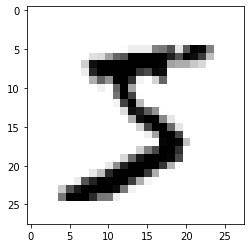

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print 25 training examples to see how the digits were written.

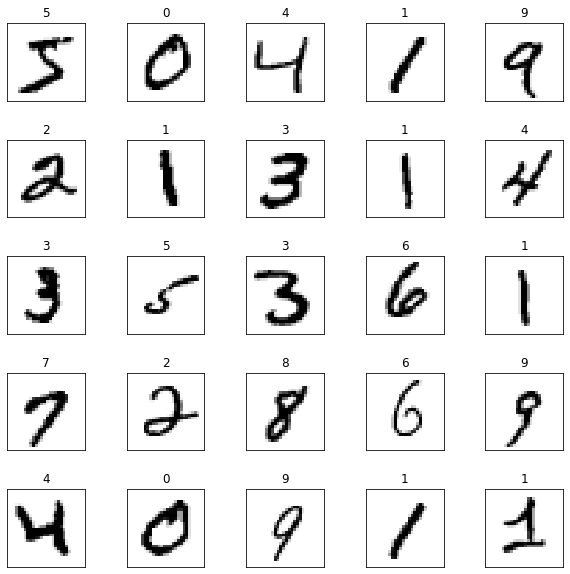

In [6]:
# How many numbers to display.
numbers_to_display = 25

# Calculate the number of cells that will hold all the numbers.
num_cells = math.ceil(math.sqrt(numbers_to_display))

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(10, 10))

# Go through the first numbers in a training set and plot them.
for plot_index in range(numbers_to_display):
    # Extract digit data.
    digit_label = y_train[plot_index]
    digit_pixels = x_train[plot_index]

    # Calculate image size (remember that each picture has square proportions).
    image_size = int(math.sqrt(digit_pixels.shape[0]))
    
    # Plot the number matrix.
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(digit_pixels, cmap=plt.cm.binary)
    plt.title(digit_label)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Plot all subplots.
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Normalize data

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization.

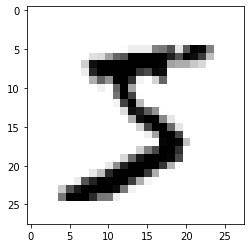

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

### Build a model

We will use [sequential Keras model](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) of 4 layers:

- Layer 1: **Flatten** layer that will flatten image 2D matrices into 1D vectors.
- Layer 2: **Input** layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...   

In [10]:
# Input layers.
layer1 = tf.keras.layers.Flatten(input_shape=x_train.shape[1:])
layer2 = tf.keras.layers.Dense(128, activation=tf.keras.activations.relu)
# Hidden layers.
layer3 = tf.keras.layers.Dense(128, activation=tf.keras.activations.relu)
# Output layers.
layer4 = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)

# Combine layers together throuhg sequential model.
model = tf.keras.models.Sequential([layer1, layer2, layer3, layer4])

Here is our model summary so far.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Compile model

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### Train model

In [13]:
training_history = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2310 - accuracy: 0.9313
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0970 - accuracy: 0.9700
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0678 - accuracy: 0.9786
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0504 - accuracy: 0.9835s - loss: 0.0491 - accuracy
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0400 - accuracy: 0.9875


Let's see how the loss function was changing during the training. We expect it to be smaller on every next epoch.

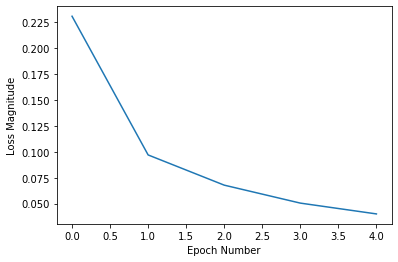

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(training_history.history['loss'])

### Evaluate model accuracy

In [49]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train, y_train)

In [50]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.03800550175451984
Training accuracy:  0.9874833


In [51]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

In [52]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.08076328559019604
Validation accuracy:  0.9749


### Save model

In [53]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model shuold be saved to HDF5.
model_name = 'digits_recognition.h5'
model.save(model_name, save_format='h5')

In [54]:
loaded_model = tf.keras.models.load_model(model_name)

### Use model

In [55]:
predictions = loaded_model.predict([x_test])

In [56]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


In [57]:
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,1.897505e-06,3.187923e-05,1.488173e-03,3.140896e-03,3.146883e-08,6.533609e-06,1.916081e-09,9.951813e-01,2.592702e-06,1.467945e-04
1,3.956990e-10,7.870718e-05,9.999051e-01,1.564723e-05,2.023447e-10,7.575185e-08,7.954500e-09,8.281450e-11,4.199738e-07,9.738015e-12
2,1.078306e-07,9.993798e-01,1.279034e-04,1.167339e-06,9.989527e-05,2.122908e-06,1.699636e-05,2.556807e-04,1.112159e-04,5.007465e-06
3,9.981914e-01,2.351977e-05,6.986049e-04,3.330388e-05,8.201971e-06,2.800690e-04,4.977936e-06,4.048462e-04,1.921459e-07,3.549236e-04
4,5.569153e-08,1.186475e-07,9.378594e-08,4.915873e-09,9.983307e-01,1.534279e-07,1.135871e-07,1.205476e-06,1.736098e-07,1.667497e-03
...,...,...,...,...,...,...,...,...,...,...
9995,4.980388e-13,1.686784e-06,9.999980e-01,3.253767e-07,9.379926e-17,4.434797e-13,4.054670e-16,2.755889e-08,2.467673e-09,1.152842e-12
9996,3.367093e-13,3.348578e-09,1.521256e-07,9.999813e-01,2.411908e-13,8.867972e-07,8.974782e-18,2.140861e-11,8.511179e-08,1.767787e-05
9997,8.372708e-13,3.008090e-09,2.580642e-10,2.453987e-11,9.999993e-01,7.646837e-10,6.820799e-11,3.874595e-07,2.267278e-07,1.725825e-07
9998,7.485228e-09,1.298828e-10,9.812099e-10,3.912878e-08,3.421647e-11,9.997677e-01,4.519641e-08,1.862201e-09,2.323324e-04,3.756248e-10


In [58]:
print(np.argmax(predictions[0]))

7


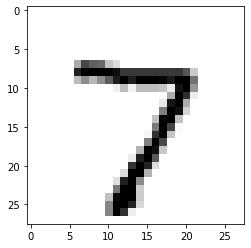

In [59]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()